# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.


---
# Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

---

***The goal is to analyze a dataset containing information on used cars to identify the key factors influencing their prices. This data task involves exploring and understanding the dataset to uncover patterns and correlations that contribute to variations in car prices. The outcome should be actionable insights and recommendations for a used car dealership, helping them understand what features consumers value in a used car.***


---
# Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

---

***IMPORT LIBRARIES FOR EXPLORATION***

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

***LOAD DATASET***

In [2]:
# Load the dataset
df = pd.read_csv('data/vehicles.csv')

***DISPLAY BASIC INFO ABOUT DATA***
- Display basic information about the dataset
- Summary statistics for numerical features

In [3]:
print('---'*20,'\nINFO:\n','---'*20)
print(df.info(),'\n','---'*20)
print('DESCRIBE:\n','---'*20)
print(df.describe())

------------------------------------------------------------ 
INFO:
 ------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type  

***Explore missing values***
- visualize the missing values using a heatmap
- run a numeric coorelation matrix
- visualize a Chi/P-value contingency matrix

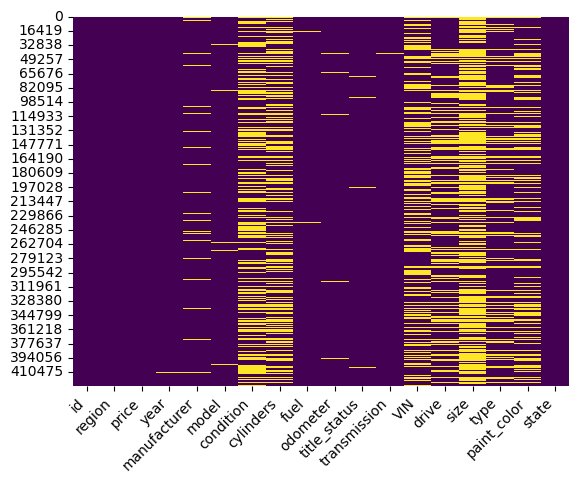

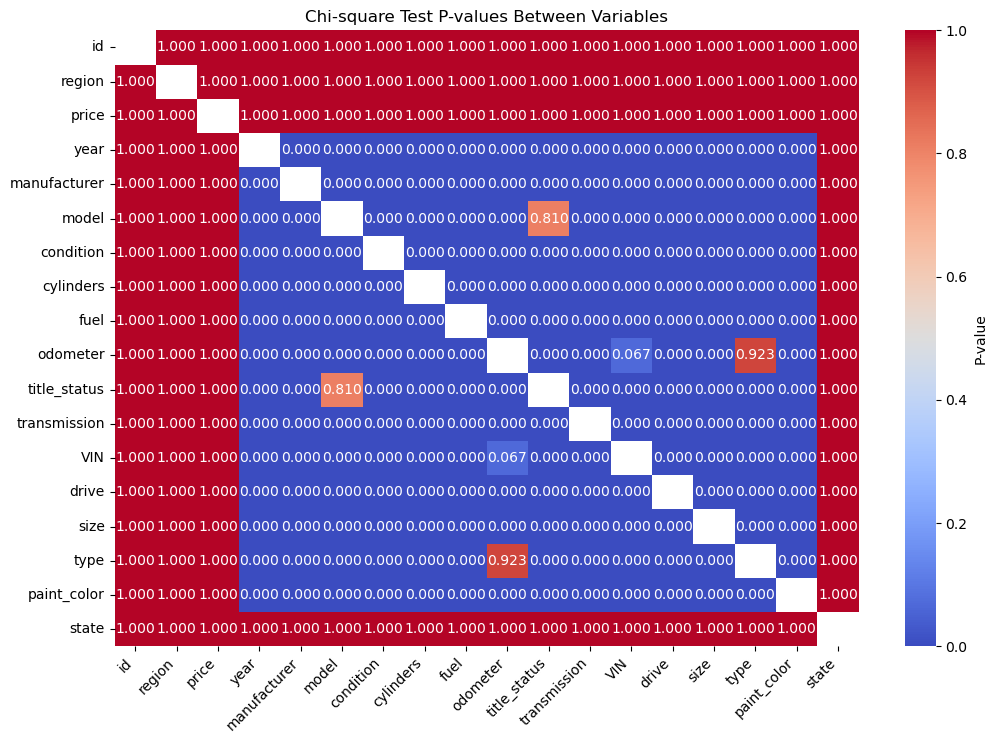

In [4]:
# PART 1
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha='right')
plt.show()

# PART 2
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

# PART 3
# loop through each column of dataframe and compare next columns values with current columns values and place them in a table
columns = df.columns
p_values = pd.DataFrame(index=columns, columns=columns)
for column1 in columns:
    for column2 in columns:
        if column1 != column2:
            contingency_table = pd.crosstab(df[column1].isnull(), df[column2].notnull())
            chi2, p, _, _ = chi2_contingency(contingency_table)
            p_values.at[column1, column2] = p
# Convert p-values to numeric
p_values = p_values.apply(pd.to_numeric, errors='coerce')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(p_values, annot=True, cmap='coolwarm', fmt=".3f", cbar_kws={'label': 'P-value'})
plt.title('Chi-square Test P-values Between Variables')
plt.xticks(rotation=45, ha='right')
plt.show()

***EXPLORE CATEGORICAL FEATURES AND THEIR UNIQUENESS***

In [5]:
for column in df.columns:
    print(f'COLUMN: {column}\n')
#     print(df[column].value_counts())
    print(f'FEATURES:\n{df[column].unique()}\n','---'*20)

COLUMN: id

FEATURES:
[7222695916 7218891961 7221797935 ... 7301591147 7301591140 7301591129]
 ------------------------------------------------------------
COLUMN: region

FEATURES:
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san lu

FEATURES:
[nan 'white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow'
 'orange' 'green' 'custom' 'purple']
 ------------------------------------------------------------
COLUMN: state

FEATURES:
['az' 'ar' 'fl' 'ma' 'nc' 'ny' 'or' 'pa' 'tx' 'wa' 'wi' 'al' 'ak' 'ca'
 'co' 'ct' 'dc' 'de' 'ga' 'hi' 'id' 'il' 'in' 'ia' 'ks' 'ky' 'la' 'me'
 'md' 'mi' 'mn' 'ms' 'mo' 'mt' 'ne' 'nv' 'nj' 'nm' 'nh' 'nd' 'oh' 'ok'
 'ri' 'sc' 'sd' 'tn' 'ut' 'vt' 'va' 'wv' 'wy']
 ------------------------------------------------------------


***SAMPLING DATA TO REDUCE WORKLOAD OF PC ~ RAM***

In [6]:
sampled_df = df.sample(n=10000, random_state=42)

***EXPLORE DATA FURTHER USING DIFFERENT PLOTTING TYPES ~ In Order***
- histogram
- heatmap
- barplot
- lineplot
- scatterplot
- pearplot
- boxplot
- violinplot
- crosstab

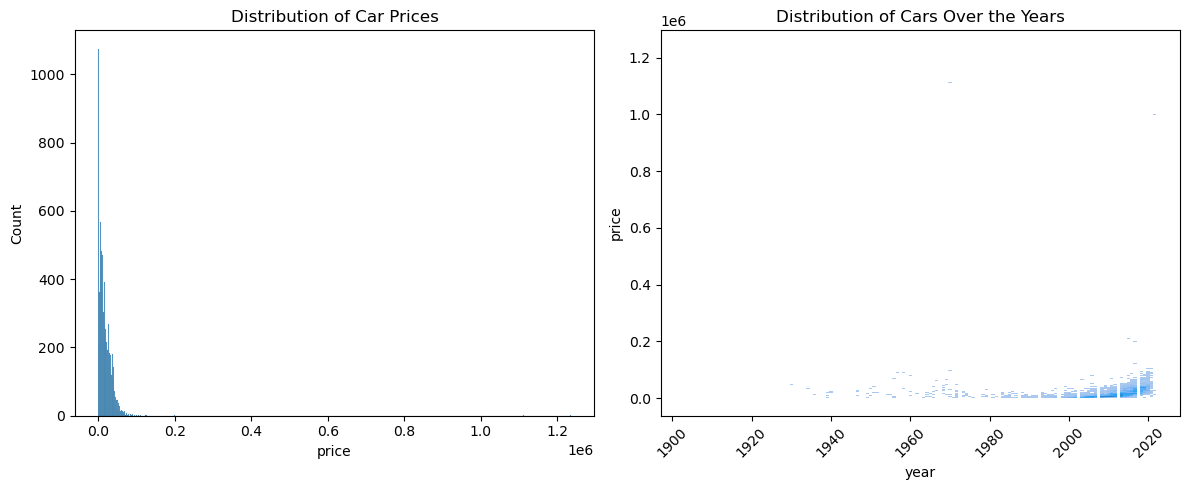

In [7]:
# HISTOGRAM

# Create a figure and axes with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first histogram
sns.histplot(sampled_df['price'], bins=1000, ax=axes[0])
axes[0].set_title('Distribution of Car Prices')

# Plot the second histogram
sns.histplot(data=sampled_df, x='year', y='price', ax=axes[1])
axes[1].set_title('Distribution of Cars Over the Years')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for the second subplot

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()

C:\Users\CAG\AppData\Local\Temp\ipykernel_22428\3904978114.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sampled_df.corr()


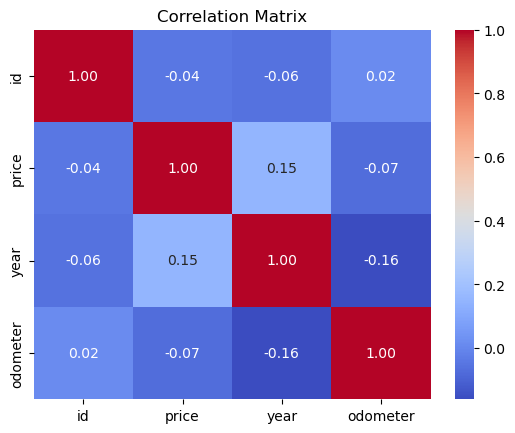

In [8]:
# HEATMAP

correlation_matrix = sampled_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

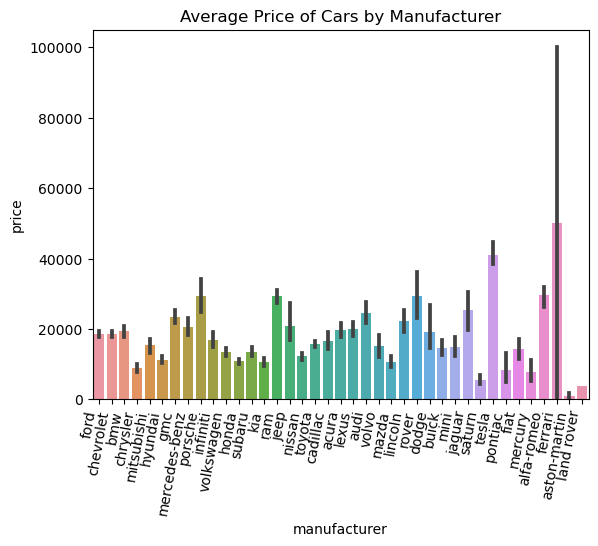

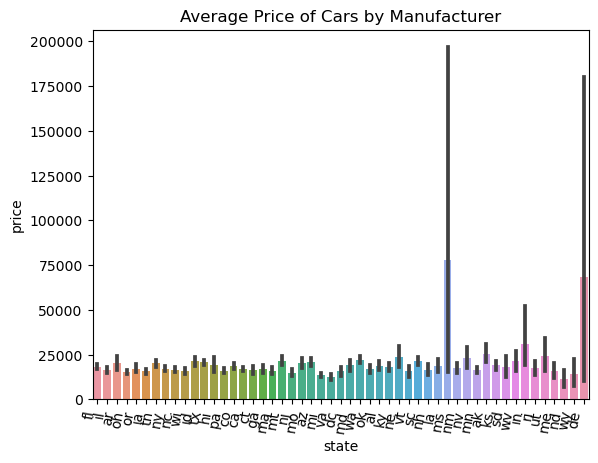

In [9]:
# BARPLOT

sns.barplot(data=sampled_df, x='manufacturer', y='price')
plt.xticks(rotation=80, ha='right')
plt.title('Average Price of Cars by Manufacturer')
plt.show()

sns.barplot(data=sampled_df, x='state', y='price')
plt.xticks(rotation=80, ha='right')
plt.title('Average Price of Cars by Manufacturer')
plt.show()

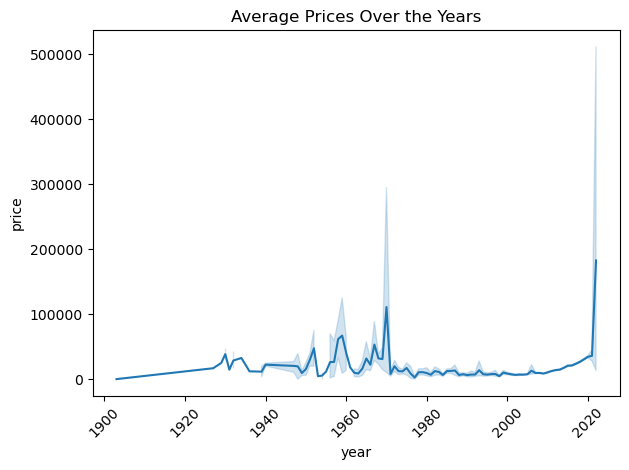

In [10]:
# LINEPLOT

sns.lineplot(data=sampled_df, x='year', y='price')
plt.title('Average Prices Over the Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

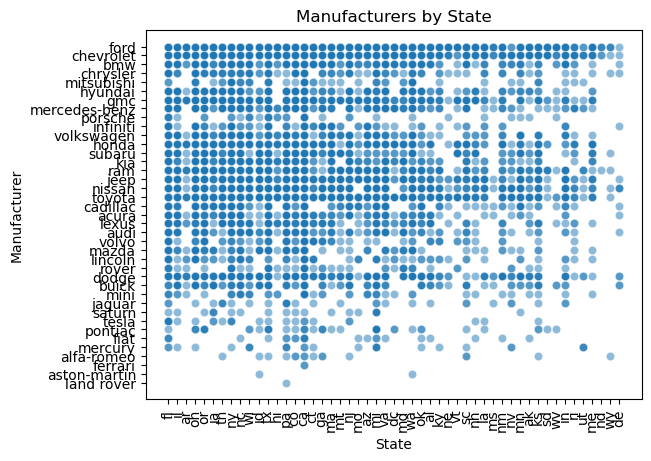

In [11]:
# SCATTERPLOT

sns.scatterplot(data=sampled_df, x='state', y='manufacturer', alpha=0.5)
plt.title('Manufacturers by State')
plt.xlabel('State')
plt.ylabel('Manufacturer')
plt.xticks(rotation=90, ha='center')
plt.show()

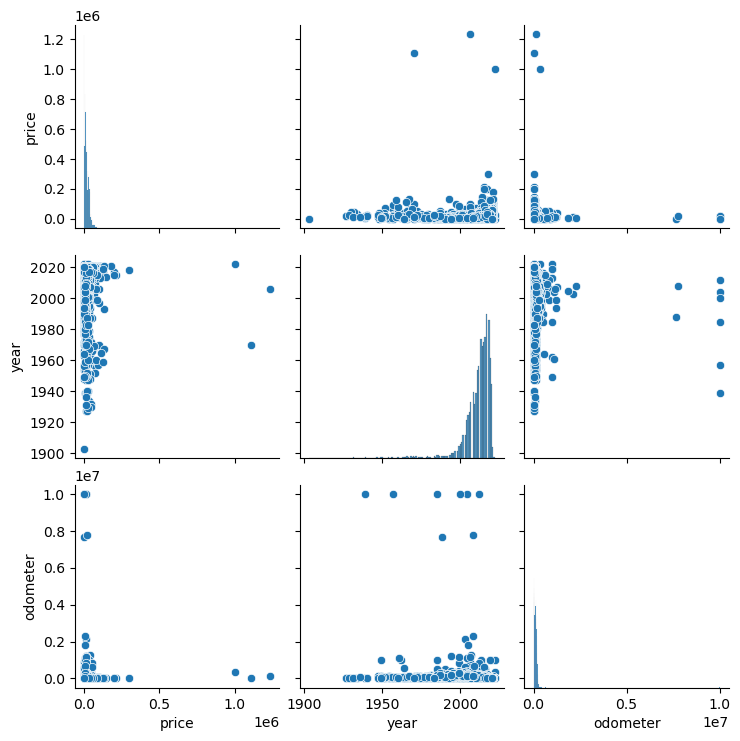

In [12]:
# PAIRPLOT

sns.pairplot(sampled_df[['price', 'year', 'odometer']])
plt.show()

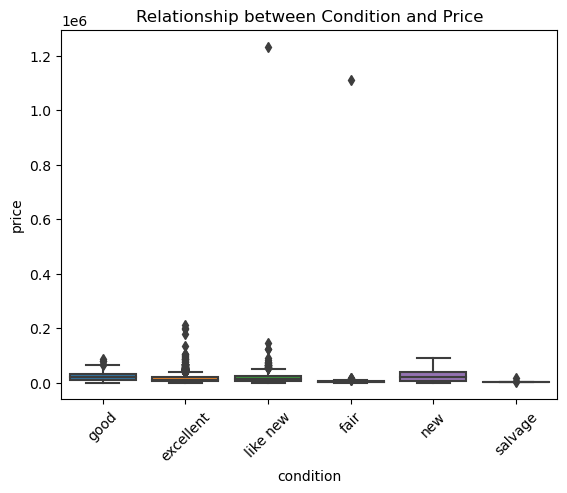

In [13]:
# BOXPLOT

sns.boxplot(data=sampled_df, x='condition', y='price')
plt.title(f'Relationship between Condition and Price')
plt.xticks(rotation=45)
plt.show()

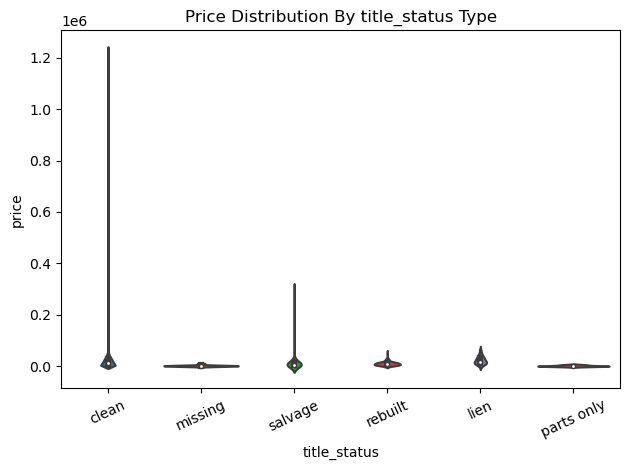

In [14]:
# VIOLINPLOT

sns.violinplot(data=sampled_df, x='title_status', y='price')
plt.title(f'Price Distribution By title_status Type')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

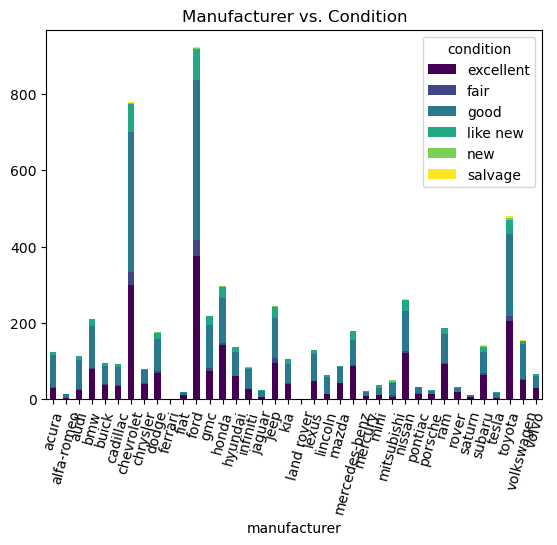

In [15]:
# CROSSTAB

pd.crosstab(sampled_df['manufacturer'], sampled_df['condition']).plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Manufacturer vs. Condition')
plt.xticks(rotation=75)
plt.show()


---
# Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

---

***DROP UNNECESSARY COLUMNS (id, VIN)***

In [16]:
# DROP UNNECESSARY COLUMNS (id, VIN)
if ('id' in df.columns) | ('VIN' in df.columns):
    df = df.drop(columns=['id', 'VIN'])

***DROP ROWS WITH MISSING 'price'***

In [17]:
df = df.dropna(subset=['price']) 

***CONVERT COLUMN 'YEAR' INTO INTEGER***

In [18]:
# Convert 'year' to integer, handling errors by coercing
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int32')
df.sample()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
196231,detroit metro,8900,2014,chevrolet,traverse,good,6 cylinders,gas,159000.0,clean,automatic,fwd,NaN,NaN,blue,mi


***ADDING 2 NEW COLUMNS***
- adding the 'age' of the car to show how old it is in comparison to the current year
- adding the OPTION for conversion from 'miles' to 'kilometers' to allow universal interpretation for client.

In [19]:
# Create a new feature 'age' based on the 'year' of the car
df['age'] = 2023 - df['year']

# Convert odometer from miles to kilometers
# df['odometer_km'] = df['odometer'] * 1.60934

df.sample()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,age
200789,grand rapids,6900,2011,ford,f150,good,8 cylinders,gas,214000.0,clean,automatic,4wd,NaN,NaN,black,mi,12


### ***HANDLE MISSING VALUES***

2 MOTHODS:
1. remove every row with missing data then run models
2. fill missing data by using mean median mode to fill

**METHOD 1:**

In [20]:
df_nan_removed = df.dropna()

# Verify that there are no more missing values
print(df_nan_removed.isnull().any())
print(df_nan_removed.info())

region          False
price           False
year            False
manufacturer    False
model           False
condition       False
cylinders       False
fuel            False
odometer        False
title_status    False
transmission    False
drive           False
size            False
type            False
paint_color     False
state           False
age             False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
Int64Index: 79195 entries, 31 to 426836
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        79195 non-null  object 
 1   price         79195 non-null  int64  
 2   year          79195 non-null  Int32  
 3   manufacturer  79195 non-null  object 
 4   model         79195 non-null  object 
 5   condition     79195 non-null  object 
 6   cylinders     79195 non-null  object 
 7   fuel          79195 non-null  object 
 8   odometer      79195 non-null  float64
 9   title_status  79195 non-n

**METHOD 2:**

In [21]:
# Handling missing values
for column in df.columns:
    
    # Check the data type of the column
    if df.dtypes[column] == object:
        
        # Replace NaN with 'UNKNOWN' for object columns  
        df[column].fillna(f'UNKNOWN_{column}', inplace=True)  
    
    else:    
        # Replace NaN with 0 for numerical columns
        df[column].fillna(0, inplace=True)  


# Verify that there are no more missing values
print(df.isnull().any())
print(df.info())

region          False
price           False
year            False
manufacturer    False
model           False
condition       False
cylinders       False
fuel            False
odometer        False
title_status    False
transmission    False
drive           False
size            False
type            False
paint_color     False
state           False
age             False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          426880 non-null  Int32  
 3   manufacturer  426880 non-null  object 
 4   model         426880 non-null  object 
 5   condition     426880 non-null  object 
 6   cylinders     426880 non-null  object 
 7   fuel          426880 non-null  object 
 8   odometer      426880 non-null  float64
 9   title_status  

***SEPARATE THE NUMERIC AND CATEGORICAL FEATURES***

- Since both dataframes are have the same columns I only need to loop through 1 of them
- In this case I will just use the regular ''df''

In [22]:
numerical_features = df.select_dtypes(include=['int64', 'Int64', 'int32', 'Int32', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['price', 'year', 'odometer', 'age']
Categorical Features: ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']


---

***PREPARING FOR THE MODELING PHASE***
- IMPORTS
- Encode categorical features
- Separate the target feature 'price'
- Split the data into training and testing sets

In [23]:
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [24]:
df_encoded = pd.get_dummies(df_nan_removed, columns=categorical_features, drop_first=True)

In [25]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***APPLY PRICIPAL COMPONENT ANALYSIS (PCA)***

In [ ]:
# Adjust the number of components based on your needs using 'n_components' option in PCA()
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

***APPLY STANDARD SCALAR***
- this prevents bias models for L1 and L2 regression models
- improves performance speeds

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


---
# Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

---

***IMPORTS***

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

---

### RUNNING 5 MODELS:

- ***MODEL 1: LINEAR REGRESSION***
- ***MODEL 2: LASSO REGRESSION***
- ***MODEL 3: RIDGE REGRESSION***
- ***MODEL 4: RANDOM FOREST REGRESSOR***
- ***MODEL 5: GRADIENT BOOSTING REGRESSOR***


In [ ]:
# Model 1: Linear Regression with PCA
linear_reg_pca = LinearRegression()
linear_scores_pca = cross_val_score(linear_reg_pca, X_train_pca, y_train, scoring='neg_mean_squared_error', cv=5)
linear_rmse_pca = np.sqrt(-linear_scores_pca.mean())
print("Linear Regression with PCA RMSE:", linear_rmse_pca)

---

***SCALING DATA FOR L1 and L2 REGRESSION MODELS***

In [31]:
# Model 2
# lasso_reg = Lasso()
# lasso_scores = cross_val_score(lasso_reg, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
# lasso_rmse = np.sqrt(-lasso_scores.mean())
# print("Lasso Regression RMSE:", lasso_rmse_pca)

In [32]:
# Model 3
# ridge_reg = Ridge()
# ridge_scores = cross_val_score(ridge_reg, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
# ridge_rmse = np.sqrt(-ridge_scores.mean())
# print("Ridge Regression RMSE:", ridge_rmse)


---

In [33]:
# Model 4
# rf_reg = RandomForestRegressor()
# rf_scores = cross_val_score(rf_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
# rf_rmse = np.sqrt(-rf_scores.mean()
# print("Random Forest Regression RMSE:", rf_rmse)


In [34]:
# Model 5
# gb_reg = GradientBoostingRegressor()
# gb_scores = cross_val_score(gb_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
# gb_rmse = np.sqrt(-gb_scores.mean())
# print("Gradient Boosting Regression RMSE:", gb_rmse)



---
# Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

---

***IMPORTS***

In [ ]:
from sklearn.metrics import r2_score

***EVALUATING MODEL 1: LINEAR REGRESSION***

In [ ]:
# Fit the model
# Make predictions on the training set
# Calculate residuals
# Plot residuals
linear_reg_pca.fit(X_train_pca, y_train)
y_pred_train = linear_reg_pca.predict(X_train_pca)
residuals = y_train - y_pred_train
plt.scatter(y_pred_train, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Make predictions on the training set
# Calculate R-squared
y_pred_train = linear_reg_pca.predict(X_train_pca)
r2 = r2_score(y_train, y_pred_train)
print("R-squared:", r2)

# Get feature coefficients
feature_coefficients = pd.Series(linear_reg_pca.coef_, index=X_train.columns)

# Sort coefficients by magnitude
sorted_coefficients = feature_coefficients.abs().sort_values(ascending=False)

# Print or visualize the top coefficients
print("Top Feature Coefficients:")
print(sorted_coefficients.head())


# Cross-validated RMSE
cross_val_rmse = np.sqrt(-cross_val_score(linear_reg_pca, X_train_pca, y_train, scoring='neg_mean_squared_error', cv=5).mean())
print("Cross-validated RMSE:", cross_val_rmse)

# Make predictions on the test set
# Calculate test set RMSE
y_pred_test = linear_reg_pca.predict(X_test_pca)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test Set RMSE:", test_rmse)


***EVALUATING MODEL 2: LASSO REGRESSION***

***EVALUATING MODEL 3: RIDGE REGRESSION***

***EVALUATING MODEL 4: RANDOM FOREST REGRESSOR***

***EVALUATING MODEL 5: GRADIENT BOOSTING REGRESSOR***


---
# Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

---